# Simularemos um buy & hold com um rebalancemaneto diário e equal weights em uma lista de ações:

# Importamos os módulos necessários:

In [8]:
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt 

# Pegando e estruturando os dados:

In [9]:
#Definimos os tickers utilizados:
stock_tickers=['ABEV3.SA','LREN3.SA','PETR4.SA','VALE3.SA','PSSA3.SA','POMO4.SA','LAME4.SA','MRFG3.SA','BBAS3.SA','ITUB4.SA'\
              ,'BBDC4.SA','USIM5.SA','BRFS3.SA','CIEL3.SA','CMIG4.SA','GGBR3.SA','CSAN3.SA','SULA11.SA','SBSP3.SA','TOTS3.SA'\
              ,'WEGE3.SA','EGIE3.SA','SANB11.SA','RENT3.SA','HYPE3.SA','DTEX3.SA','FLRY3.SA','MULT3.SA','BRML3.SA','MRVE3.SA'\
              ,'CPFE3.SA','BTOW3.SA','EMBR3.SA','JBSS3.SA','TIMP3.SA','IGTA3.SA','GOLL4.SA','ENBR3.SA']

stock_prices = pd.DataFrame()
for stock in stock_tickers:
    stock_prices[stock]=wb.DataReader(stock,data_source='yahoo',start='2010-01-01')['Adj Close']

# Montando as duas estratégias, buy & hold e rebalanceamento diários com equal weights:

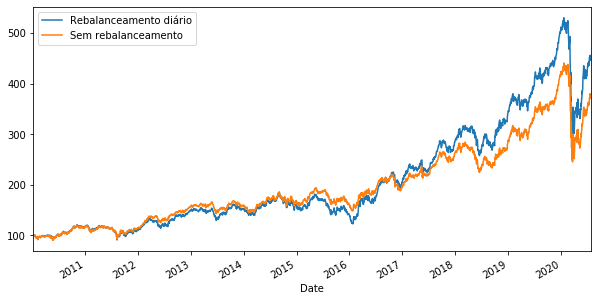

In [10]:
stock_returns = stock_prices.pct_change()
stock_returns['Rebalanceamento diário'] = stock_returns[stock_tickers].mean(axis=1).add(1).cumprod()*100
stock_returns['Sem rebalanceamento'] = (stock_returns[stock_tickers].add(1).cumprod()*100).mean(axis=1)

stock_returns['Rebalanceamento diário'].plot(figsize=(10,5))
stock_returns['Sem rebalanceamento'].plot()
plt.legend()